Importing

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [14]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "src/model_architectures.ipynb"

Data loaded


Training

In [31]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
    case 'ResNet':
        model = MRI_ResNet
    case 'ResNet-Pre':
        model = MRI_Pretrained_ResNet
    case 'AlexNet':
        model = MRI_AlexNet
    case _:
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [32]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   4%|▍         | 1/25 [00:09<03:43,  9.31s/epoch]

Epoch [1/25] Train Loss: 1.3560 Train Accuracy: 28.69% Validation Loss: 1.3605 Validation Accuracy: 34.09%


Training:   8%|▊         | 2/25 [00:18<03:35,  9.39s/epoch]

Epoch [2/25] Train Loss: 1.3126 Train Accuracy: 33.91% Validation Loss: 1.3858 Validation Accuracy: 33.76%


Training:  12%|█▏        | 3/25 [00:29<03:35,  9.78s/epoch]

Epoch [3/25] Train Loss: 1.2609 Train Accuracy: 35.68% Validation Loss: 1.2652 Validation Accuracy: 41.03%


Training:  16%|█▌        | 4/25 [00:39<03:33, 10.14s/epoch]

Epoch [4/25] Train Loss: 1.1337 Train Accuracy: 45.86% Validation Loss: 1.0203 Validation Accuracy: 54.93%


Training:  20%|██        | 5/25 [00:49<03:21, 10.06s/epoch]

Epoch [5/25] Train Loss: 1.0059 Train Accuracy: 55.54% Validation Loss: 1.1540 Validation Accuracy: 49.92%


Training:  24%|██▍       | 6/25 [00:57<02:58,  9.39s/epoch]

Epoch [6/25] Train Loss: 0.9414 Train Accuracy: 60.55% Validation Loss: 0.9668 Validation Accuracy: 58.00%


Training:  28%|██▊       | 7/25 [01:05<02:41,  8.98s/epoch]

Epoch [7/25] Train Loss: 0.8589 Train Accuracy: 65.61% Validation Loss: 0.9192 Validation Accuracy: 61.07%


Training:  32%|███▏      | 8/25 [01:13<02:26,  8.62s/epoch]

Epoch [8/25] Train Loss: 0.7839 Train Accuracy: 67.71% Validation Loss: 0.8185 Validation Accuracy: 67.85%


Training:  36%|███▌      | 9/25 [01:22<02:18,  8.64s/epoch]

Epoch [9/25] Train Loss: 0.6527 Train Accuracy: 73.63% Validation Loss: 0.9410 Validation Accuracy: 59.13%


Training:  40%|████      | 10/25 [01:31<02:09,  8.64s/epoch]

Epoch [10/25] Train Loss: 0.5843 Train Accuracy: 76.86% Validation Loss: 0.5005 Validation Accuracy: 81.42%


Training:  44%|████▍     | 11/25 [01:38<01:57,  8.41s/epoch]

Epoch [11/25] Train Loss: 0.5036 Train Accuracy: 80.73% Validation Loss: 0.5620 Validation Accuracy: 78.51%


Training:  48%|████▊     | 12/25 [01:48<01:52,  8.65s/epoch]

Epoch [12/25] Train Loss: 0.4777 Train Accuracy: 81.92% Validation Loss: 0.5441 Validation Accuracy: 77.38%


Training:  52%|█████▏    | 13/25 [01:58<01:48,  9.05s/epoch]

Epoch [13/25] Train Loss: 0.4562 Train Accuracy: 81.97% Validation Loss: 0.4150 Validation Accuracy: 83.68%


Training:  56%|█████▌    | 14/25 [02:07<01:41,  9.25s/epoch]

Epoch [14/25] Train Loss: 0.3627 Train Accuracy: 86.87% Validation Loss: 0.3440 Validation Accuracy: 86.59%


Training:  60%|██████    | 15/25 [02:16<01:29,  8.98s/epoch]

Epoch [15/25] Train Loss: 0.3187 Train Accuracy: 89.61% Validation Loss: 0.3308 Validation Accuracy: 87.40%


Training:  64%|██████▍   | 16/25 [02:23<01:17,  8.60s/epoch]

Epoch [16/25] Train Loss: 0.2864 Train Accuracy: 89.18% Validation Loss: 0.2335 Validation Accuracy: 91.11%


Training:  68%|██████▊   | 17/25 [02:31<01:06,  8.35s/epoch]

Epoch [17/25] Train Loss: 0.2153 Train Accuracy: 92.41% Validation Loss: 0.2057 Validation Accuracy: 93.38%


Training:  72%|███████▏  | 18/25 [02:39<00:57,  8.16s/epoch]

Epoch [18/25] Train Loss: 0.1663 Train Accuracy: 93.60% Validation Loss: 0.2067 Validation Accuracy: 92.57%


Training:  76%|███████▌  | 19/25 [02:47<00:48,  8.03s/epoch]

Epoch [19/25] Train Loss: 0.1798 Train Accuracy: 94.35% Validation Loss: 0.1098 Validation Accuracy: 95.96%


Training:  80%|████████  | 20/25 [02:54<00:39,  7.94s/epoch]

Epoch [20/25] Train Loss: 0.1290 Train Accuracy: 95.43% Validation Loss: 0.1422 Validation Accuracy: 95.32%


Training:  84%|████████▍ | 21/25 [03:02<00:31,  7.87s/epoch]

Epoch [21/25] Train Loss: 0.0966 Train Accuracy: 96.77% Validation Loss: 0.0844 Validation Accuracy: 96.93%


Training:  88%|████████▊ | 22/25 [03:10<00:23,  7.83s/epoch]

Epoch [22/25] Train Loss: 0.0982 Train Accuracy: 96.50% Validation Loss: 0.0636 Validation Accuracy: 98.06%


Training:  92%|█████████▏| 23/25 [03:19<00:16,  8.14s/epoch]

Epoch [23/25] Train Loss: 0.0751 Train Accuracy: 97.52% Validation Loss: 0.0660 Validation Accuracy: 98.38%


Training:  96%|█████████▌| 24/25 [03:27<00:08,  8.35s/epoch]

Epoch [24/25] Train Loss: 0.0672 Train Accuracy: 97.47% Validation Loss: 0.1246 Validation Accuracy: 95.96%


Training: 100%|██████████| 25/25 [03:36<00:00,  8.66s/epoch]

Epoch [25/25] Train Loss: 0.0859 Train Accuracy: 96.61% Validation Loss: 0.0581 Validation Accuracy: 98.71%


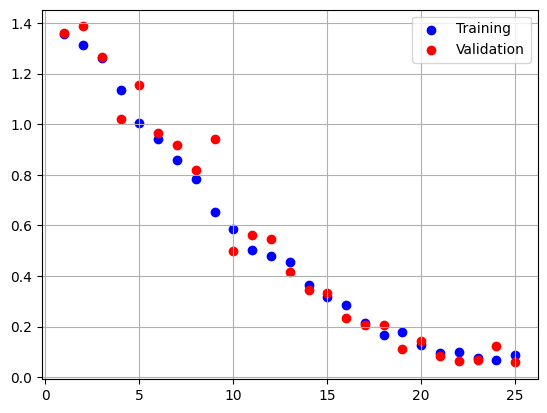

In [33]:
plt.scatter(range(1, len(training_losses)+1), training_losses, c='blue', label='Training')
plt.scatter(range(1, len(validation_losses)+1), validation_losses, c='red', label='Validation')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(5), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  20%|██        | 1/5 [00:01<00:04,  1.19s/epoch]

Testing Epoch [1/25] Test Loss: 0.2856 Test Accuracy: 90.15% Time per Epoch: 1.19 seconds


Testing:  40%|████      | 2/5 [00:02<00:03,  1.11s/epoch]

Testing Epoch [2/25] Test Loss: 0.2857 Test Accuracy: 90.31% Time per Epoch: 1.05 seconds


Testing:  60%|██████    | 3/5 [00:03<00:02,  1.08s/epoch]

Testing Epoch [3/25] Test Loss: 0.2999 Test Accuracy: 90.79% Time per Epoch: 1.04 seconds


Testing:  80%|████████  | 4/5 [00:04<00:01,  1.06s/epoch]

Testing Epoch [4/25] Test Loss: 0.2989 Test Accuracy: 89.34% Time per Epoch: 1.03 seconds


Testing: 100%|██████████| 5/5 [00:05<00:00,  1.07s/epoch]

Testing Epoch [5/25] Test Loss: 0.2964 Test Accuracy: 89.66% Time per Epoch: 1.05 seconds
Average Test Loss: 0.2933
Average Test Accuracy: 90.05%


Model Classification:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       546
           1       0.94      0.96      0.95       560
           2       0.95      0.98      0.97       254
           3       0.99      0.99      0.99       497

    accuracy                           0.96      1857
   macro avg       0.96      0.97      0.96      1857
weighted avg       0.96      0.96      0.96      1857

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       169
           1       0.76      0.83      0.79       175
           2       0.92      0.85      0.88        97
           3       0.83      0.97      0.89       178

    accuracy                           0.83       619
   macro avg       0.85      0.83      0.84       619
weighted avg       0.84      0.83      0.83       619

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       186
           1       0.

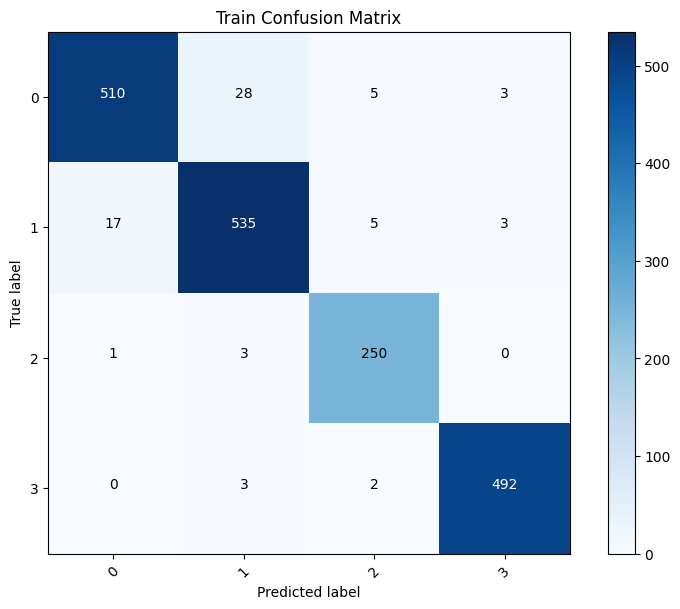

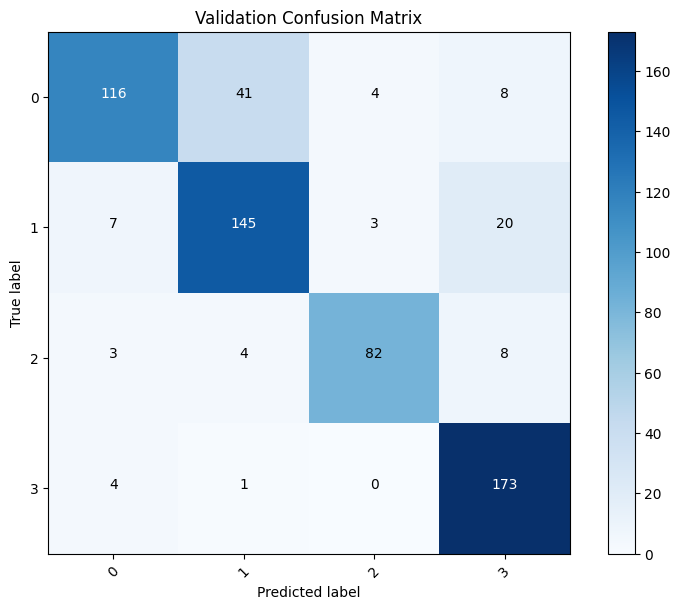

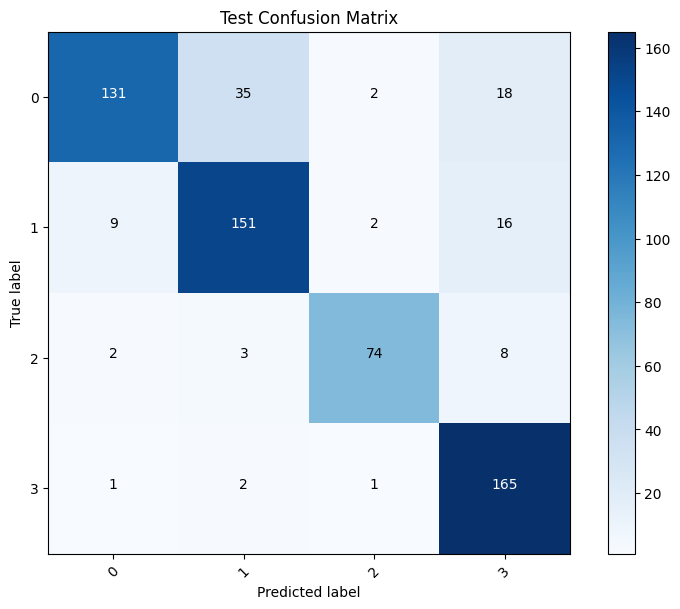

In [11]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()